hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


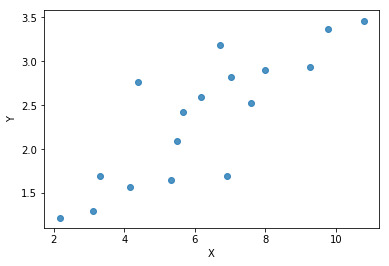

In [1]:
""" Linear Regression Example """

%matplotlib inline
from __future__ import absolute_import, division, print_function
import tflearn
import seaborn as sns
import pandas as pd

# Regression data
X = [3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1]
Y = [1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3]

# Create a pandas dataframe and visulize it with seaborn
df = pd.DataFrame()
df["X"] = X
df["Y"] = Y
sns.regplot(x="X", y="Y", data=df, fit_reg=False);

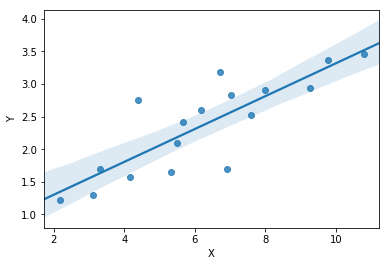

In [2]:
# The blue line is what we want to predict with our neural net by using gradient descent
sns.regplot(x="X", y="Y", data=df, fit_reg=True);

In [3]:
# TFlearn code from: https://github.com/tflearn/tflearn/tree/master/examples/basics, Author: Aymeric Damien
# Linear Regression graph
# Input Layer
input_ = tflearn.input_data(shape=[None])
linear = tflearn.single_unit(input_)
# Output Layer
regression = tflearn.regression(linear, optimizer='adam', loss='mean_square',
                                metric='R2', learning_rate=0.01)
# Train the model
m = tflearn.DNN(regression)
m.fit(X, Y, n_epoch=1000, show_metric=True, snapshot_epoch=False)

# Print the result
print("\nRegression result:")
print("Y = " + str(m.get_weights(linear.W)) +
      "*X + " + str(m.get_weights(linear.b)))

print("\nTest prediction for x = 3.2, 3.3, 3.4:")
print(m.predict([3.2, 3.3, 3.4]))
# should output (close, not exact) y = [1.5315033197402954, 1.5585315227508545, 1.5855598449707031]

Training Step: 1000  | total loss: 0.15386 | time: 0.004s
| Adam | epoch: 1000 | loss: 0.15386 - R2: 0.9747 -- iter: 17/17

Regression result:
Y = [ 0.25204605]*X + [ 0.79592085]

Test prediction for x = 3.2, 3.3, 3.4:
[ 1.60246825  1.62767279  1.65287745]


## A visual example of the gradient descent
![alt text](gradient_descent_example.gif "Title")
Source: https://github.com/mattnedrich/GradientDescentExample/blob/master/gradient_descent_example.gif